In [ ]:
# Question 1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

df1 = pd.read_csv('/content/Walmart_Sales.csv')

In [ ]:
df1.shape

(6435, 8)

In [ ]:
df1.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [ ]:
df1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df1.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [ ]:
df1.dtypes

,0
Store,int64
Date,object
Weekly_Sales,float64
Holiday_Flag,int64
Temperature,float64
Fuel_Price,float64
CPI,float64
Unemployment,float64


In [ ]:
# a) Preprocessing the data to put into a machine learning model.

In [ ]:
processed_df = df1.copy()

In [ ]:
processed_df['Store'] = processed_df['Store'].astype(str)
processed_df = pd.get_dummies(processed_df, columns=['Store'], drop_first=True)
processed_df = processed_df.drop('Date', axis=1)

In [ ]:
# defining features and train-test split
X = processed_df.drop('Weekly_Sales', axis=1)
y = processed_df['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# b) Multiple linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression

mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)
mlr_coefficients = pd.Series(mlr_model.coef_, index=X_train.columns)
mlr_intercept = mlr_model.intercept_

print("--- MLR Model Interpretation ---")
print(f"Intercept: ${mlr_intercept:,.2f}")
print("\nCoefficients (in descending order):")
print(mlr_coefficients.sort_values(ascending=False).to_string())

--- MLR Model Interpretation ---
Intercept: $1,211,014.36

Coefficients (in descending order):
Store_4         7.868619e+05
Store_13        7.138299e+05
Store_10        6.530089e+05
Store_20        5.729460e+05
Store_14        5.634710e+05
Store_27        4.982432e+05
Store_2         3.681852e+05
Store_28        1.834467e+05
Store_19        1.568762e+05
Store_24        7.399951e+04
Holiday_Flag    7.276384e+04
Store_23        3.152837e+04
CPI             3.220848e+03
Temperature    -7.851585e+02
Store_6        -1.276754e+04
Unemployment   -2.116503e+04
Fuel_Price     -4.275984e+04
Store_39       -1.024783e+05
Store_12       -1.405201e+05
Store_31       -1.665303e+05
Store_18       -1.827426e+05
Store_11       -2.108171e+05
Store_41       -2.434993e+05
Store_34       -2.731352e+05
Store_22       -2.796512e+05
Store_26       -2.967311e+05
Store_32       -3.189643e+05
Store_35       -3.816067e+05
Store_40       -4.013443e+05
Store_17       -4.199754e+05
Store_45       -6.562988e+05
Store_

In [ ]:
# c) Performance of multiple linear regression model

y_pred_mlr = mlr_model.predict(X_test)

mlr_r2 = r2_score(y_test, y_pred_mlr)
mlr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_mlr))
mlr_mae = mean_absolute_error(y_test, y_pred_mlr)

print("--- MLR Model Performance ---")
print(f"R-squared: {mlr_r2:.4f}")
print(f"RMSE: ${mlr_rmse:,.2f}")
print(f"MAE: ${mlr_mae:,.2f}")

--- MLR Model Performance ---
R-squared: 0.9208
RMSE: $159,683.97
MAE: $91,043.93


In [ ]:
# d) Ridge model

In [ ]:
from sklearn.linear_model import RidgeCV

# --- Feature Scaling for Regularized Models ---
scaler = StandardScaler()

# Identify continuous and categorical features
continuous_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
other_features = [col for col in X_train.columns if col not in continuous_features]

# Scale continuous features on the training set and transform test set
X_train_cont_scaled = scaler.fit_transform(X_train[continuous_features])
X_test_cont_scaled = scaler.transform(X_test[continuous_features])

# Re-combine scaled continuous features with unscaled categorical/binary features
X_train_scaled = pd.DataFrame(X_train_cont_scaled, columns=continuous_features, index=X_train.index)
X_train_scaled = pd.concat([X_train_scaled, X_train[other_features]], axis=1)

X_test_scaled = pd.DataFrame(X_test_cont_scaled, columns=continuous_features, index=X_test.index)
X_test_scaled = pd.concat([X_test_scaled, X_test[other_features]], axis=1)

# --- Ridge Regression ---
# Find optimal alpha using cross-validation (5-fold)
alphas = np.logspace(-4, 4, 100) # Range of alphas from 0.0001 to 10000
ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_scaled, y_train)

best_alpha_ridge = ridge_cv.alpha_
ridge_model = ridge_cv # The model is trained

# Interpretation
ridge_coefficients = pd.Series(ridge_model.coef_, index=X_train_scaled.columns)

# Performance
y_pred_ridge = ridge_model.predict(X_test_scaled)
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("--- Ridge Regression ---")
print(f"How best alpha ($\lambda$) is found: Using 5-fold Cross-Validation on a log-spaced range of 100 alpha values (0.0001 to 10000) to minimize the Negative Mean Squared Error.")
print(f"Best Alpha ($\lambda$): {best_alpha_ridge:.4f}")
print(f"R-squared: {ridge_r2:.4f}")
print(f"RMSE: ${ridge_rmse:,.2f}")
print("\nTop 10 Coefficients (for interpretation of scaled data):")
print(ridge_coefficients.sort_values(ascending=False).head(10).to_string())

<>:39: SyntaxWarning: invalid escape sequence '\l'
<>:40: SyntaxWarning: invalid escape sequence '\l'
<>:39: SyntaxWarning: invalid escape sequence '\l'
<>:40: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-4019729885.py:39: SyntaxWarning: invalid escape sequence '\l'
  print(f"How best alpha ($\lambda$) is found: Using 5-fold Cross-Validation on a log-spaced range of 100 alpha values (0.0001 to 10000) to minimize the Negative Mean Squared Error.")
/tmp/ipython-input-4019729885.py:40: SyntaxWarning: invalid escape sequence '\l'
  print(f"Best Alpha ($\lambda$): {best_alpha_ridge:.4f}")


--- Ridge Regression ---
How best alpha ($\lambda$) is found: Using 5-fold Cross-Validation on a log-spaced range of 100 alpha values (0.0001 to 10000) to minimize the Negative Mean Squared Error.
Best Alpha ($\lambda$): 0.0060
R-squared: 0.9208
RMSE: $159,685.34

Top 10 Coefficients (for interpretation of scaled data):
Store_4     798292.024912
Store_13    725113.918211
Store_10    664136.123662
Store_20    574799.014304
Store_14    567717.374675
Store_27    508259.924681
Store_2     369103.351770
Store_28    193681.877699
Store_19    167371.481995
CPI         131057.413580


In [ ]:
# e) Lasso regression model

In [ ]:
from sklearn.linear_model import LassoCV

# --- Lasso Regression ---
# Find optimal alpha using cross-validation (5-fold)
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000, random_state=42, n_jobs=-1)
lasso_cv.fit(X_train_scaled, y_train)

best_alpha_lasso = lasso_cv.alpha_
lasso_model = lasso_cv # The model is trained

# Interpretation
lasso_coefficients = pd.Series(lasso_model.coef_, index=X_train_scaled.columns)

# Performance
y_pred_lasso = lasso_model.predict(X_test_scaled)
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print("--- Lasso Regression ---")
print(f"How best alpha ($\lambda$) is found: Using 5-fold Cross-Validation on a log-spaced range of 100 alpha values (0.0001 to 10000) to find the alpha that minimizes the Mean Squared Error.")
print(f"Best Alpha ($\lambda$): {best_alpha_lasso:.4f}")
print(f"R-squared: {lasso_r2:.4f}")
print(f"RMSE: ${lasso_rmse:,.2f}")
print("\nNon-zero Coefficients (Lasso uses L1 penalty for feature selection):")
# Only show coefficients that are not effectively zero
print(lasso_coefficients[lasso_coefficients.abs() > 1e-6].sort_values(ascending=False).to_string())

<>:20: SyntaxWarning: invalid escape sequence '\l'
<>:21: SyntaxWarning: invalid escape sequence '\l'
<>:20: SyntaxWarning: invalid escape sequence '\l'
<>:21: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-2532328585.py:20: SyntaxWarning: invalid escape sequence '\l'
  print(f"How best alpha ($\lambda$) is found: Using 5-fold Cross-Validation on a log-spaced range of 100 alpha values (0.0001 to 10000) to find the alpha that minimizes the Mean Squared Error.")
/tmp/ipython-input-2532328585.py:21: SyntaxWarning: invalid escape sequence '\l'
  print(f"Best Alpha ($\lambda$): {best_alpha_lasso:.4f}")


--- Lasso Regression ---
How best alpha ($\lambda$) is found: Using 5-fold Cross-Validation on a log-spaced range of 100 alpha values (0.0001 to 10000) to find the alpha that minimizes the Mean Squared Error.
Best Alpha ($\lambda$): 0.5214
R-squared: 0.9208
RMSE: $159,685.14

Non-zero Coefficients (Lasso uses L1 penalty for feature selection):
Store_4         7.958653e+05
Store_13        7.227142e+05
Store_10        6.617676e+05
Store_20        5.742896e+05
Store_14        5.667278e+05
Store_27        5.061065e+05
Store_2         3.687735e+05
Store_28        1.914761e+05
Store_19        1.651069e+05
CPI             1.301312e+05
Store_24        8.216929e+04
Holiday_Flag    7.271632e+04
Store_23        4.020324e+04
Store_6        -1.216029e+04
Temperature    -1.449740e+04
Fuel_Price     -1.972130e+04
Unemployment   -3.934889e+04
Store_39       -1.018049e+05
Store_12       -1.324219e+05
Store_31       -1.659001e+05
Store_18       -1.746428e+05
Store_11       -2.104573e+05
Store_41       -

In [ ]:
# f) Model comparison:

y_pred_mlr = mlr_model.predict(X_test)
mlr_r2 = r2_score(y_test, y_pred_mlr)
mlr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_mlr))

y_pred_ridge = ridge_model.predict(X_test_scaled)
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

y_pred_lasso = lasso_model.predict(X_test_scaled)
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Model': ['Multiple Linear Regression (MLR)', 'Ridge Regression', 'Lasso Regression'],
    'R-squared': [mlr_r2, ridge_r2, lasso_r2],
    'RMSE': [mlr_rmse, ridge_rmse, lasso_rmse]
})

print("--- Model Performance Comparison ---")
print(comparison_df.to_string(index=False))

print("\n--- Observation ---")
print("The performance metrics (R-squared and RMSE) for all three models are nearly identical. This suggests that the data does not suffer from severe multicollinearity, and the simple MLR model is highly effective. Regularization provides minimal predictive benefit over the standard MLR in this case.")

--- Model Performance Comparison ---
                           Model  R-squared          RMSE
Multiple Linear Regression (MLR)   0.920849 159683.968378
                Ridge Regression   0.920847 159685.339136
                Lasso Regression   0.920847 159685.141169

--- Observation ---
The performance metrics (R-squared and RMSE) for all three models are nearly identical. This suggests that the data does not suffer from severe multicollinearity, and the simple MLR model is highly effective. Regularization provides minimal predictive benefit over the standard MLR in this case.


In [ ]:
# Question 2

In [ ]:
# a) Data preprocessing
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, accuracy_score, recall_score,
    roc_curve, auc, roc_auc_score
)

file_path = "framingham.csv"
framingham_df = pd.read_csv(file_path)

framingham_processed_df = framingham_df.copy()

# median imputation for continuous features
impute_cols_median = ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']
for col in impute_cols_median:
    framingham_processed_df[col].fillna(framingham_processed_df[col].median(), inplace=True)

# mode imputation for binary/ordinal features
mode_bpmeds = framingham_processed_df['BPMeds'].mode()[0]
mode_education = framingham_processed_df['education'].mode()[0]

framingham_processed_df['BPMeds'].fillna(mode_bpmeds, inplace=True)
framingham_processed_df['education'].fillna(mode_education, inplace=True)


framingham_processed_df.to_csv('framingham_processed.csv', index=False)

print("Data Preprocessing Complete. Missing values imputed.")

Data Preprocessing Complete. Missing values imputed.


/tmp/ipython-input-3173847383.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  framingham_processed_df[col].fillna(framingham_processed_df[col].median(), inplace=True)
/tmp/ipython-input-3173847383.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [ ]:
# b) Binary logistic regression model
# defining features
X = framingham_processed_df.drop('TenYearCHD', axis=1)
y = framingham_processed_df['TenYearCHD']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# backward Selection Function
def backward_selection(X_train, y_train, p_threshold=0.05):
    """Performs backward elimination based on p-values from a Logit model."""
    features = list(X_train.columns)
    while True:

        X_with_const = sm.add_constant(X_train[features], prepend=False)

        # logistic regression model
        model = sm.Logit(y_train, X_with_const).fit(disp=0)
        p_values = model.pvalues.drop('const')
        max_p_value = p_values.max()

        if max_p_value > p_threshold:

            feature_to_remove = p_values.idxmax()
            features.remove(feature_to_remove)
        else:
            break
    return features

# running backward selection
final_features = backward_selection(X_train, y_train)
print(f"\n(b) Final selected features (p < 0.05): {final_features}")

# training final model with selected features

# scaling the selected features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[final_features])
X_test_scaled = scaler.transform(X_test[final_features])

lr_model = LogisticRegression(solver='liblinear', random_state=42)
lr_model.fit(X_train_scaled, y_train)

# --- (c) Model Performance (Default Threshold: 0.5) ---

# Get predicted classes and probabilities
y_pred_class = lr_model.predict(X_test_scaled)
y_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

# confusion matrix and metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_class).ravel()
accuracy = accuracy_score(y_test, y_pred_class)
sensitivity = recall_score(y_test, y_pred_class) # True Positive Rate
specificity = tn / (tn + fp) # True Negative Rate

print("\n(c) Model Performance (Threshold: 0.5)")
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Confusion Matrix (TN, FP, FN, TP): {tn, fp, fn, tp}")


(b) Final selected features (p < 0.05): ['male', 'age', 'cigsPerDay', 'prevalentStroke', 'totChol', 'sysBP', 'glucose']

(c) Model Performance (Threshold: 0.5)
Accuracy: 0.8479
Sensitivity (Recall): 0.0620
Specificity: 0.9889
Confusion Matrix (TN, FP, FN, TP): (np.int64(711), np.int64(8), np.int64(121), np.int64(8))



(d) Optimal Threshold Results
Optimal Threshold (Maximizing Youden's J): 0.0908
Model Performance at Optimal Threshold:
Sensitivity: 0.8760
Specificity: 0.4465

(e) Area Under the Curve (AUC): 0.6979
ROC plot saved as 'roc_auc_plot.png'


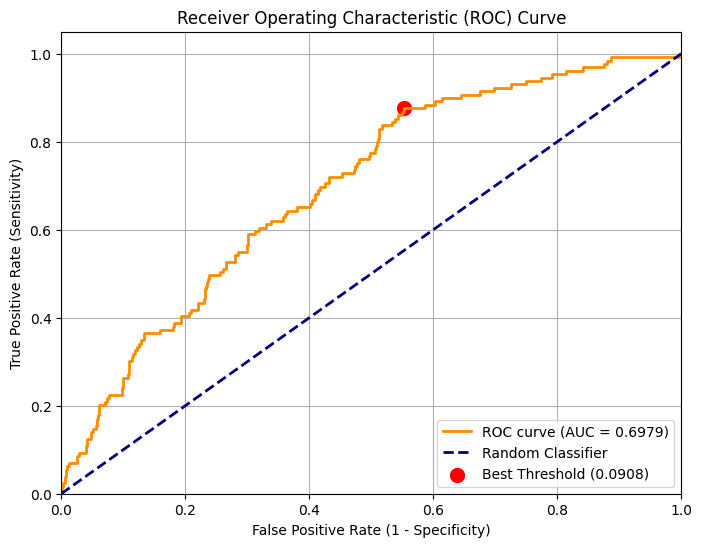

In [ ]:
# d) choosing thresholds and e) ROC and AUC plots
# --- (d) Optimal Threshold Analysis ---

# Calculate ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Find the optimal threshold (maximizing Youden's J: J = TPR - FPR)
youden_j = tpr - fpr
optimal_threshold_index = np.argmax(youden_j)
best_threshold = thresholds[optimal_threshold_index]

# Calculate metrics at the best threshold
y_pred_best = (y_pred_proba >= best_threshold).astype(int)
tn_b, fp_b, fn_b, tp_b = confusion_matrix(y_test, y_pred_best).ravel()
sensitivity_best = recall_score(y_test, y_pred_best)
specificity_best = tn_b / (tn_b + fp_b)
accuracy_best = accuracy_score(y_test, y_pred_best)

print("\n(d) Optimal Threshold Results")
print(f"Optimal Threshold (Maximizing Youden's J): {best_threshold:.4f}")
print("Model Performance at Optimal Threshold:")
print(f"Sensitivity: {sensitivity_best:.4f}")
print(f"Specificity: {specificity_best:.4f}")

# --- (e) ROC and AUC Plot ---

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], marker='o', color='red', s=100,
            label=f'Best Threshold ({best_threshold:.4f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_auc_plot.png')

print(f"\n(e) Area Under the Curve (AUC): {roc_auc:.4f}")
print("ROC plot saved as 'roc_auc_plot.png'")

In [ ]:
# Question 3

In [9]:
import pandas as pd
import numpy as np

In [10]:
df3 = pd.read_csv('/content/bmi.csv')

In [11]:
df3.isnull().sum()

,0
Gender,0
Height,0
Weight,0
Index,0


In [12]:
df3.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [29]:
# preprocessing to prepare the data for the machine learning models
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

file_path = "bmi.csv"
df = pd.read_csv(file_path)

# defining features
X = df.drop('Index', axis=1)
y = df['Index']

# separating the features
numerical_features = ['Height', 'Weight']
categorical_features = ['Gender']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

# splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# dictionary to compare the results
results = {}

In [30]:
# a) one vs rest model

model_ovr = LogisticRegression(
    multi_class='ovr', solver='liblinear', random_state=42, max_iter=1000
)

model_ovr.fit(X_train_processed, y_train)
y_pred_ovr = model_ovr.predict(X_test_processed)

accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
report_ovr = classification_report(y_test, y_pred_ovr, output_dict=True, zero_division=0)

results['OvR (One-vs-Rest)'] = {
    'Accuracy': accuracy_ovr,
    'Classification Report': report_ovr
}

print("\n--- (a) One-vs-Rest (OvR) Model Results ---")
print(f"Accuracy: {accuracy_ovr:.4f}")
print("Classification Report:")
print(pd.DataFrame(report_ovr).transpose())


--- (a) One-vs-Rest (OvR) Model Results ---
Accuracy: 0.6900
Classification Report:
              precision    recall  f1-score  support
0              0.000000  0.000000  0.000000     3.00
1              0.000000  0.000000  0.000000     4.00
2              0.500000  0.714286  0.588235    14.00
3              0.000000  0.000000  0.000000    14.00
4              0.555556  0.769231  0.645161    26.00
5              0.886364  1.000000  0.939759    39.00
accuracy       0.690000  0.690000  0.690000     0.69
macro avg      0.323653  0.413919  0.362193   100.00
weighted avg   0.560126  0.690000  0.616601   100.00


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [32]:
# b) one vs one model

model_ovo = OneVsOneClassifier(
    LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
)

model_ovo.fit(X_train_processed, y_train)
y_pred_ovo = model_ovo.predict(X_test_processed)

accuracy_ovo = accuracy_score(y_test, y_pred_ovo)
report_ovo = classification_report(y_test, y_pred_ovo, output_dict=True, zero_division=0)

results['OvO (One-vs-One)'] = {
    'Accuracy': accuracy_ovo,
    'Classification Report': report_ovo
}

print("\n--- (b) One-vs-One (OvO) Model Results ---")
print(f"Accuracy: {accuracy_ovo:.4f}")
print("Classification Report:")
print(pd.DataFrame(report_ovo).transpose())


--- (b) One-vs-One (OvO) Model Results ---
Accuracy: 0.8900
Classification Report:
              precision    recall  f1-score  support
0              0.000000  0.000000  0.000000     3.00
1              0.000000  0.000000  0.000000     4.00
2              0.736842  1.000000  0.848485    14.00
3              0.928571  0.928571  0.928571    14.00
4              0.960000  0.923077  0.941176    26.00
5              0.974359  0.974359  0.974359    39.00
accuracy       0.890000  0.890000  0.890000     0.89
macro avg      0.599962  0.637668  0.615432   100.00
weighted avg   0.862758  0.890000  0.873494   100.00


In [33]:
# c) softmax function

model_softmax = LogisticRegression(
    multi_class='multinomial', solver='lbfgs', random_state=42, max_iter=1000
)

model_softmax.fit(X_train_processed, y_train)
y_pred_softmax = model_softmax.predict(X_test_processed)

accuracy_softmax = accuracy_score(y_test, y_pred_softmax)
report_softmax = classification_report(y_test, y_pred_softmax, output_dict=True, zero_division=0)

results['Softmax (Multinomial)'] = {
    'Accuracy': accuracy_softmax,
    'Classification Report': report_softmax
}

print("\n--- (c) Softmax (Multinomial) Model Results ---")
print(f"Accuracy: {accuracy_softmax:.4f}")
print("Classification Report:")
print(pd.DataFrame(report_softmax).transpose())


--- (c) Softmax (Multinomial) Model Results ---
Accuracy: 0.8500
Classification Report:
              precision    recall  f1-score  support
0              0.000000  0.000000  0.000000     3.00
1              0.000000  0.000000  0.000000     4.00
2              0.736842  1.000000  0.848485    14.00
3              1.000000  0.571429  0.727273    14.00
4              0.806452  0.961538  0.877193    26.00
5              0.974359  0.974359  0.974359    39.00
accuracy       0.850000  0.850000  0.850000     0.85
macro avg      0.586275  0.584554  0.571218   100.00
weighted avg   0.832835  0.850000  0.828676   100.00


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [34]:
# d) comparing the results of the models
comparison_data = {
    'Model': [],
    'Accuracy': [],
    'Macro Avg F1-score': [],
    'Weighted Avg F1-score': []
}

for name, res in results.items():
    comparison_data['Model'].append(name)
    comparison_data['Accuracy'].append(res['Accuracy'])
    comparison_data['Macro Avg F1-score'].append(res['Classification Report']['macro avg']['f1-score'])
    comparison_data['Weighted Avg F1-score'].append(res['Classification Report']['weighted avg']['f1-score'])

comparison_df = pd.DataFrame(comparison_data)

print("\n--- (d) Model Performance Comparison ---")
print(comparison_df.sort_values(by='Accuracy', ascending=False).to_string(index=False))


--- (d) Model Performance Comparison ---
                Model  Accuracy  Macro Avg F1-score  Weighted Avg F1-score
     OvO (One-vs-One)      0.89            0.615432               0.873494
Softmax (Multinomial)      0.85            0.571218               0.828676
    OvR (One-vs-Rest)      0.69            0.362193               0.616601
